In [60]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

In [61]:
friesgo_2018= pd.read_csv('friesgo2018.txt', delimiter = '|')

In [62]:
friesgo_2018.shape

(29224, 287)

In [63]:
friesgo_2018.columns



Index(['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado',
       'localidades_150', 'submuestra', 'bhcv01', 'bhcv02', 'bhcv03',
       ...
       'glucemia_elevada', 'prevalencia_glucemia_elevada_combinada',
       'findrisc', 'bimq06', 'bimq06_01', 'colesterol_elevado',
       'prevalencia_colesterol_combinada', 'wf1p', 'wf2p', 'wf3p'],
      dtype='object', length=287)

In [64]:
#columnas a utilizar para el análisis actual

dominio_geografico = friesgo_2018.iloc[:, :7]
salud_y_af = friesgo_2018.iloc[:,list(range(0,1))+ list(range(73,98))]                                                     
caracteristicas_encuestado = friesgo_2018.iloc[:,list(range(0,1))+ list(range(51,66))]
hipertension = friesgo_2018.iloc[:,list(range(0,1))+ list(range(140,160))]
colesterol = friesgo_2018.iloc[:,list(range(0,1))+ list(range(187,195))]


#pesocorporal = friesgo_2018.iloc[:,list(range(0,1))+ list(range(160:168))]
#alimentacion = friesgo_2018.iloc[:,list(range(0,1))+ list(range(169:186))]
#diabetes = friesgo_2018.iloc[:,list(range(0,1))+ list(range(218:236))]
#mediciones_antropometricas = friesgo_2018.iloc[:,list(range(0,1))+ list(range(252:273))]
#mediciones_bioquimicas = friesgo_2018.iloc[:,list(range(0,1))+ list(range(274:283))]
#tabaquismo = friesgo_2018.iloc[:,list(range(0,1))+ list(range(98, 132))]
#consumo_alcohol = friesgo_2018.iloc[:,list(range(0,1))+ list(range(195,217))]

In [65]:
#cambio de nombre de algunas columnas

salud_y_af.rename(columns = {
    #SALUD GENERAL 
    "bisg01" : "salud_actual",
    "bisg02" : "nivel_de_movilidad",
    "bisg03" : "capacidad_cuidado_personal",
    "bisg04" : "capacidad_actividades_cotidianas",
    "bisg05" : "dolor_malestar_general",
    "bisg06" : "ansiedad_depresion",

#ACTIVIDAD FÍSICA  af
    "biaf01" : "af_intensa_veces_por_semana",
    "iaf02_m" : "af_intensa_min_totales_por_semana",
    "biaf02_99" : "af_intensa_min_totales_por_semana_nsnc",
    "biaf03" : "af_moderada_veces_por_semana",
    "biaf04_m" : "af_moderada_min_totales_por_semana",
    "biaf04_99" : "actividad_fisica_moderada_min_totales_por_semana_nsnc",
    "biaf05" : "caminata_veces_por_semana",
    "biaf06_m" : "caminata_min_totales_por_semana",
    "biaf06_99" : "caminata_min_totales_por_semana_nsnc",
    "biaf07_m" : "tiempo_sentado_min_por_dia",
    "biaf07_99" : "tiempo_sentado_min_por_dia_nsnc",
    "biaf08" : "razon_ninguna_actividad_la_ultima_semana",
    "biaf09" : "razon_poca_actividad_la_ultima_semana",
    "biaf10_01" : "af_fue_actividad_domestica",
    "biaf10_02" : "af_fue_actividad_laboral",
    "biaf10_03" : "af_fue_traslado",
    "biaf10_04" : "af_fue_deporte"

    }, inplace = True)


caracteristicas_encuestado.rename(columns={
      'bhch02':'parentesco_con_jefeHogar',
      'bhch03':'sexo',
      'bhch04':'edad',
      'bhch05':'situacion_conyugal',
      'bhch10_01':'ascociado_Obra_social',
      'bhch10_02':'asociado_prepaga_porObra_social',
      'bhch10_03':'asociado_prepaga',
      'bhch10_04':'asociado_servicio_emergencia',
      'bhch10_05':'asociado_plan_estatal',
      'bhch10_06':'no_asociado_nada',
      'bhch10_99':'ns_nc'}, inplace=True) 


hipertension.rename(columns={
    'biha01':'le_han_tomado_presion',
    'biha02':'ultima_medicion_presion',
    'biha03':'veces_presion_alta',
    'biha04':'tratamiento_presion_ultimasSemanas',
    'biha05_01':'ejercicio_dieta',
    'biha05_02':'medicamentos_presion',
    'biha06':'pastillas_por_dia_presion',
    'biha06_99':'pastillas_ns_nc',
    'biha07':'olvida_pastilla',
    'biha08':'deja_pastilla_si_esta_bien',
    'biha09':'deja_pastilla_si_esta_mal',
    'biha10':'pastillas_ultima_semana',
    'biha11':'cuantas_NO_tomo',
    'biha11_99':'cuantas_NO_tomo_ns_nc',
    'biha12':'asistir_control_presion',
    'biha13':'lugar_asistir_control_presion',
    'biha14':'atiende_mismo_profesional',
    'biha15':'medico_conoce_historia_clinica'
        }, inplace=True)


colesterol.rename( columns={
    'bico01': 'medido_colesterol',
    'bico02': 'fecha_med_colesterol',
    'bico03': 'colesterol_alto',
    'bico04': 'tratamiento_medico_col',
    'bico05_01': 'trat_habitos_col',
    'bico05_02': 'trat_farmac_col',
    'control_colesterol': 'autocontrol_col'
}, inplace= True)

In [66]:
#remuevo columnsas repetitivas o sin sentido

dominio_geografico = dominio_geografico.drop(columns = ['aglomerado'] )

# en salud_y_af no encuentro columnas repetitivas                                                 
caracteristicas_encuestado = caracteristicas_encuestado.drop(columns= ['rango_edad', 'nivel_instruccion_agrupado','cobertura_salud'] )
#en hipertension no encuentro columnas repetitivas
#en colesterol no encuentro columnas repetitivas


In [67]:
#merge de las columnas a utilizar , uso id como key y outer para incluir filas que no estén en todos
df_friesgo_reduc = dominio_geografico.merge(salud_y_af, on= 'id', how='outer' ).merge(caracteristicas_encuestado, on= 'id', how='outer')   

df_friesgo_reduc = df_friesgo_reduc.merge(hipertension, on= 'id', how='outer' ).merge(colesterol, on= 'id', how='outer' )

df_friesgo_reduc.head(10)


,id,cod_provincia,region,tamanio_aglomerado,localidades_150,submuestra,salud_actual,nivel_de_movilidad,capacidad_cuidado_personal,capacidad_actividades_cotidianas,...,control_hipertension,prevalencia_hipertension,medido_colesterol,fecha_med_colesterol,colesterol_alto,tratamiento_medico_col,trat_habitos_col,trat_farmac_col,autocontrol_col,prevalencia_colesterol
0,1128639,2,1,1,1,1,3,1,1,1,...,1,2.0,1,2.0,2,NaN,NaN,NaN,NaN,2.0
1,1709939,2,1,1,1,0,1,1,1,1,...,1,2.0,1,2.0,1,2.0,NaN,NaN,1.0,1.0
2,6874130,2,1,1,1,0,2,1,1,1,...,1,2.0,1,2.0,2,NaN,NaN,NaN,NaN,2.0
3,10319375,2,1,1,1,1,3,1,1,1,...,1,2.0,1,2.0,1,1.0,2.0,1.0,1.0,1.0
4,11140857,2,1,1,1,0,3,1,1,1,...,1,2.0,1,1.0,2,NaN,NaN,NaN,NaN,2.0
5,12665714,2,1,1,1,1,2,1,1,1,...,1,2.0,1,2.0,2,NaN,NaN,NaN,NaN,2.0
6,13089112,2,1,1,1,0,2,1,1,1,...,1,1.0,1,3.0,2,NaN,NaN,NaN,NaN,2.0
7,19254804,2,1,1,1,1,2,1,1,1,...,1,2.0,1,1.0,1,2.0,NaN,NaN,NaN,1.0
8,19959160,2,1,1,1,1,1,1,1,1,...,1,2.0,1,3.0,2,NaN,NaN,NaN,NaN,2.0
9,21544403,2,1,1,1,1,2,1,1,1,...,1,1.0,1,1.0,2,NaN,NaN,NaN,1.0,2.0


In [68]:
#transformacion de variable - convierto edad aun rango de escala de 0 a 104

scaler = MinMaxScaler()
edad_normalizado= scaler.fit_transform(df_friesgo_reduc[['edad']])
print(df_friesgo_reduc['edad'].head())
print(edad_normalizado)


0    32
1    65
2    33
3    64
4    24
Name: edad, dtype: int64
[[0.1627907 ]
 [0.54651163]
 [0.1744186 ]
 ...
 [0.65116279]
 [0.30232558]
 [0.25581395]]


In [69]:
#guardo df reducido en csv

df_friesgo_reduc.to_csv('df_friesgo_reduc.csv', sep = ',', encoding = 'utf-8')

# GRAFICO 1 
Analizaremos la ocurrencia de hipertensión en función de la situación conyugal.
Dado que la variable cantidad de personas en cada rango no era significativa, se calcularon los porcentajes para poder comparar.



In [70]:

# cambio valores con diccionario para grafico 1

situacion_conyugal_dict = {
    1: 'Unido/a',
    2: 'Casado/a',
    3: 'Separado/a',
    4: 'Divorciado/a',
    5: 'Viudo/a',
    6: 'Soltero/a'
}

df_friesgo_reduc['situacion_conyugal'] = df_friesgo_reduc['situacion_conyugal'].map(situacion_conyugal_dict)


veces_presion_alta_dict = {
    1: 'solo 1 vez',
    2: 'mas de 1 vez',
    3: 'ninguna',
    99: 'NsNc'
}

df_friesgo_reduc['veces_presion_alta'] = df_friesgo_reduc['veces_presion_alta'].map(veces_presion_alta_dict)


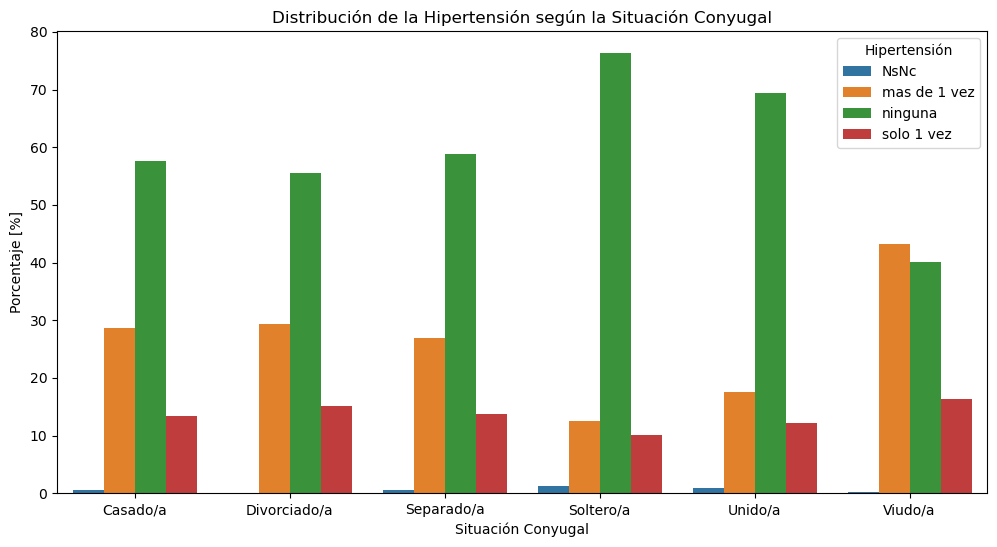

In [71]:
#agrupamos para poder calcular porcentajes de cada situación (NO solo conteo)
grouped = df_friesgo_reduc.groupby(['situacion_conyugal', 'veces_presion_alta']).size().reset_index(name='cantidad')
cuenta_total = grouped.groupby('situacion_conyugal')['cantidad'].transform('sum')
grouped['porcentaje'] = (grouped['cantidad'] / total_counts) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='situacion_conyugal', y='porcentaje', hue='veces_presion_alta')

plt.title('Distribución de la Hipertensión según la Situación Conyugal')
plt.xlabel('Situación Conyugal')
plt.ylabel('Porcentaje [%]')
plt.legend(title='Hipertensión', loc='upper right')
plt.show()

### Conclusiones gráfico 1 
En el gráfico 1 se analizan los casos de hipertensión en función de la situación conyugal. Los casos de hipertensión se clasifican en: Ninguna, solo 1 vez, más de 1 vez y ns/nc. 

Se observa que las personas solteras tienen mayor porcentaje de "ninguna" situación de hipertensión y los casados, divorciados y separados tienen un importante porcentaje de "mas de 1 vez". Finalmente la categoria viudo es la categoría que mayor porcentaje de "mas de 1 vez" posee. 
Solo con esta información se podría concluir que las pesonas que tienen o tuvieron pareja tienen una mayor tendencia a la hipertensión. Sin embargo sería interesante analizar la variable edad en este cuadro ya que es probable que tenga gran importancia dado que en general las personas solteras son jóvenes o adultos jóvenes, los casados, divorciados y separados suelen ser adultos y los viudos adultos mayores. También se observa que el grupo unido se asemeja mas al grupo soltero apesar de estar en pareja, lo que apoya más la teoría de la edad.

# GRAFICO 2 
Realizamos un BOXPLOT para poder analizar en cada catergoria las edades y poder comparar

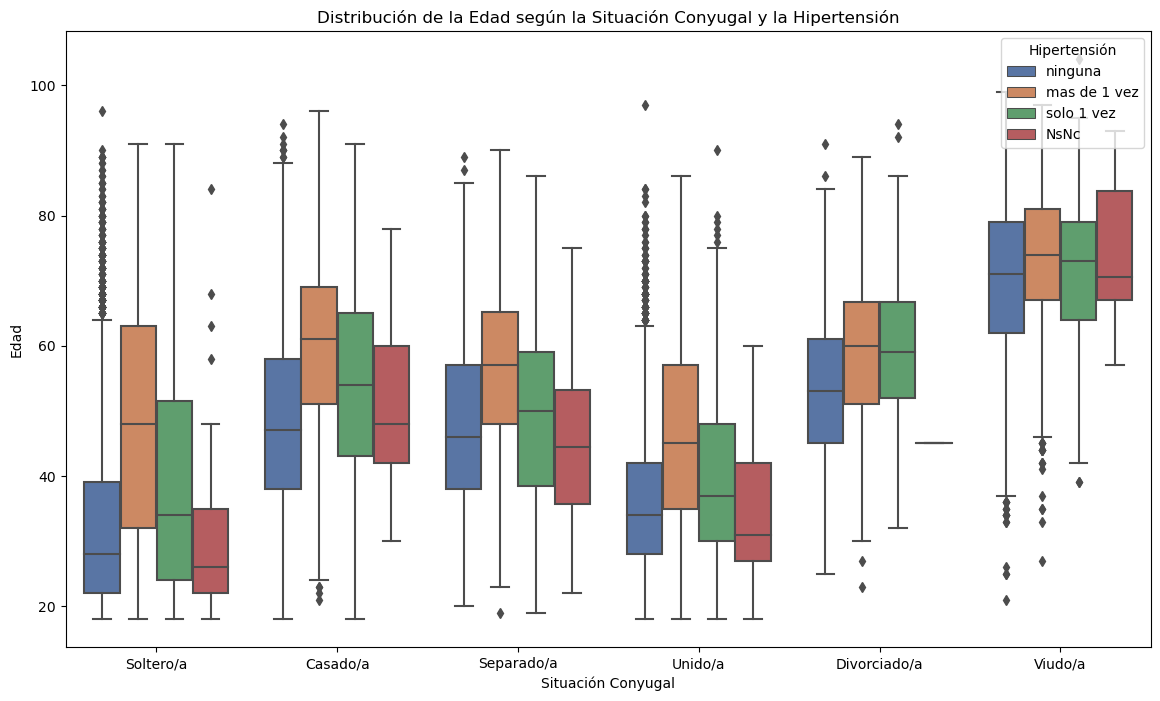

In [72]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_friesgo_reduc, x='situacion_conyugal', y='edad', hue='veces_presion_alta', palette='deep')

plt.title('Distribución de la Edad según la Situación Conyugal y la Hipertensión')
plt.xlabel('Situación Conyugal')
plt.ylabel('Edad')
plt.legend(title='Hipertensión', loc='upper right')
plt.show()

### Conclusiones gráfico 2

Se observa que efectivamente el grupo soltero y el de unido coincide con la menor edad, el grupo viudo con el de mayor edad y el grupo casado, separado y divorciado con la adultez media. Incluso se observa que dentro de cada categoría de situación conyugal, los que están en la categoría "mas de 1 vez" son aquellos de mayor edad media en el grupo.

# Gráfico 3
Se compararan la distribución de ocurrencia de hipertension en función de la edad para dos regiones de Argentina. Una será el area Metropolitana y la otra el Noroeste

In [77]:
#cambio de valores para poder analizar por region

region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}
df_friesgo_reduc['region'] = df_friesgo_reduc['region'].map(region_dict)


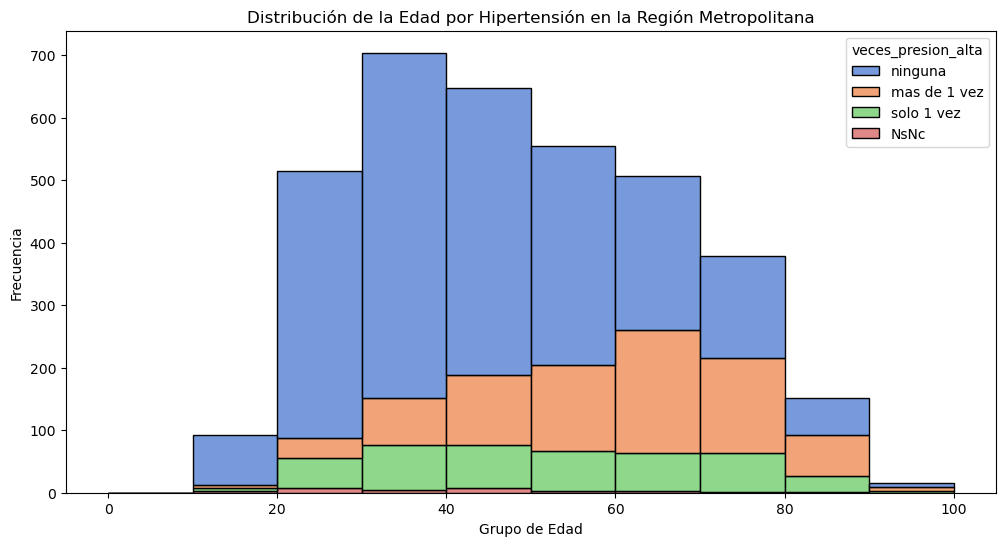

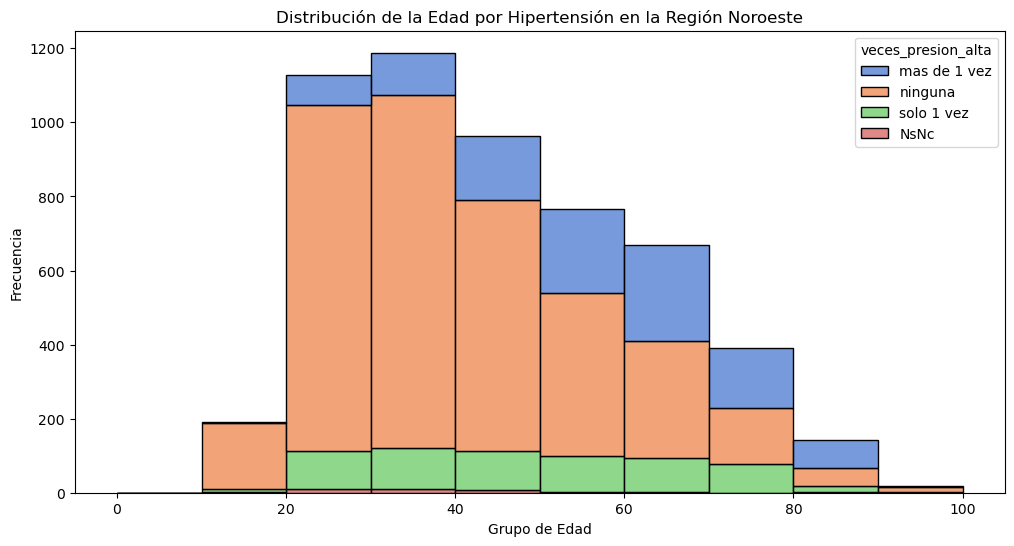

In [82]:


#obtengo dos DF por cada región
df_metropolitana = df_friesgo_reduc[df_friesgo_reduc['region'] == 'Metropolitana']
df_noroeste = df_friesgo_reduc[df_friesgo_reduc['region'] == 'Noroeste']


bins = range(0, 101, 10)

# Crear el histplot para la región Metropolitana
plt.figure(figsize=(12, 6))
sns.histplot(data=df_metropolitana, x='edad', hue='veces_presion_alta', multiple='stack', bins=bins, palette='muted')
plt.title('Distribución de la Edad por Hipertensión en la Región Metropolitana')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
#plt.xticks(bins, [f'{i}-{i+9}' for i in bins[:-1]])
plt.show()

# Crear el histplot para la región Noroeste
plt.figure(figsize=(12, 6))
sns.histplot(data=df_noroeste, x='edad', hue='veces_presion_alta', multiple='stack', bins=bins, palette='muted')
plt.title('Distribución de la Edad por Hipertensión en la Región Noroeste')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
#plt.xticks(bins, [f'{i}-{i+9}' for i in bins[:-1]])
plt.show()

### conclusion gráfico 3

Se observa que significativamente a medida que aumenta la edad, aumenta el porcentaje de personas con hipertensión.
Resulta llamativo la diferencia entre regiones, siendo la región urbana la que presenta peores niveles de hipertensión a pesar de contar con mejor sistema de salud.